# *Importing the required tools*

In [79]:
#Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
import skimage.io
import skimage.color
import skimage.transform
import numpy as np
import scipy.ndimage
from matplotlib import pyplot as plt
from skimage.color.colorconv import rgba2rgb

# *Initializations*

In [95]:
# No of gaussians chosen are - 11
s = 11
k = 2 ** (1/(s - 1))
sigma = 1.6

In [82]:
#Initializing the lists for gaussians and Diff of gaussians\
#We are using only one octave

gaussians = [None] * s
DOGs = [None] * (s - 1)
Extremas = [None] * (s - 3)

# Function that returns Extremas from 3 DOGs

In [83]:
def find_extrema(below, middle, above, shape):
  
  #Dimensions of the image
  height = shape[0]
  width = shape[1]

  #Initialize an array of image's shape to store the extremas

  extrema_points = np.zeros([height, width])
  points = 0

  for i in range(1, height - 1):
        for j in range(1, width - 1):

          # 3 lists to store each layer's values

          middle_pixels = []
          above_pixels = []
          below_pixels = []

          #present value is stored and is check for minima or maxima

          present = middle[i,j]
          
          # Traversing through the surrounding pixels and storing in the respective lists

          for m in range(i - 1, i + 2):
            for n in range(j - 1, j + 2):
              if(m != i or  n != j):
                middle_pixels.append(middle[m,n])
              above_pixels.append(above[m,n])
              below_pixels.append(below[m,n])

          #Now we have lists containing all the surrounding pixels
          
          #Checking for maxima
          
          if(present > max(middle_pixels) and present > max(above_pixels) and present > max(below_pixels)):
            extrema_points[i,j] = 1
            points += 1
          
          #Checking for minimas

          elif(present < min(middle_pixels) and present < min(above_pixels) and present < min(below_pixels)):
            extrema_points[i,j] = 1
            points +=1
            
  return extrema_points, points

# *Function that plots the scale space extremas on an image*

In [84]:
def scale_space(image):
  
  Total_points = 0
  for i in range(s):
        gaussians[i] = scipy.ndimage.gaussian_filter(image, sigma * (k ** i)) * 255
  for i in range(s - 1):
        DOGs[i] = gaussians[i + 1] - gaussians[i]
  for i in range(s - 3):
    Extremas[i], points = find_extrema(DOGs[i].copy(), DOGs[i + 1].copy(), DOGs[i + 2].copy(),image.shape)
    Total_points += points
  
  print("No. of Extremas are: ", Total_points,'\n')
  
  #Plotting the extremas superposed on the image
  for i in range(s - 3):
    image = image + Extremas[i]
  plt.imshow(image, cmap = 'gray')
  plt.show()
  print('\n\n')

# *Loading the images from drive*

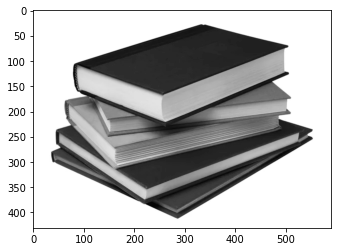

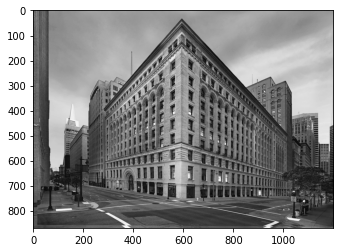

In [85]:
books = skimage.color.rgb2gray(rgba2rgb(skimage.io.imread('/content/drive/MyDrive/assignment1_data/books.png')))
building = skimage.color.rgb2gray(rgba2rgb(skimage.io.imread('/content/drive/MyDrive/assignment1_data/building.png')))
plt.imshow(books, cmap = 'gray')
plt.show()
plt.imshow(building, cmap = 'gray')
plt.show()

# *Scale Space Extremas of Normal Images*

No. of Extremas are:  1812 



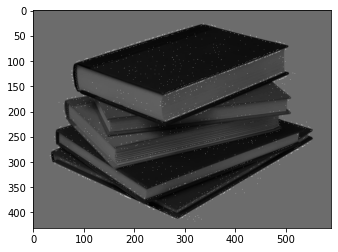




No. of Extremas are:  7114 



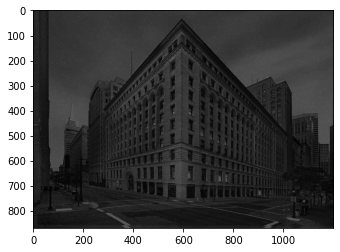

In [86]:
scale_space(books)
scale_space(building)

#*Rotation*

No. of Extremas are:  2413 



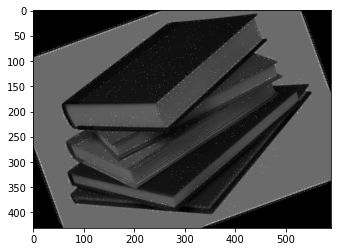




No. of Extremas are:  8770 



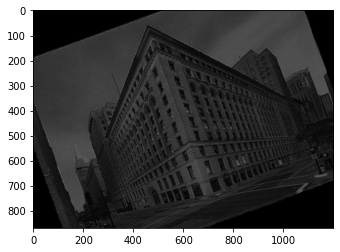

In [87]:
# Rotating by 20 degrees and detecting scale space extrema

books_rotate = skimage.transform.rotate(books, 20)
building_rotate = skimage.transform.rotate(building, 20)
scale_space(books_rotate)
scale_space(building_rotate)

No. of Extremas are:  1709 



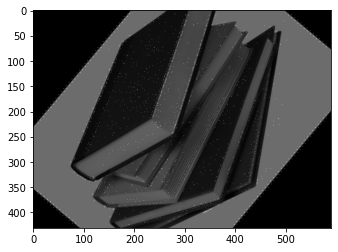




No. of Extremas are:  6521 



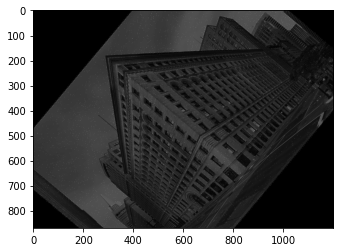

In [93]:
# Rotating by 50 degrees and detecting scale space extrema

books_rotate = skimage.transform.rotate(books, 50)
building_rotate = skimage.transform.rotate(building, 50)
scale_space(books_rotate)
scale_space(building_rotate)

# *Upscale*

No. of Extremas are:  3800 



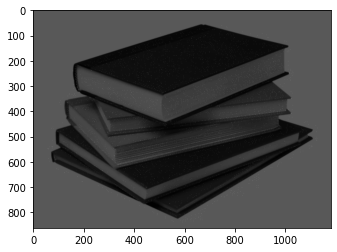




No. of Extremas are:  42377 



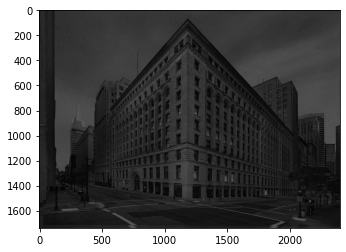

In [88]:
#Upscaling the Images

books_upscale = skimage.transform.rescale(books, 2, anti_aliasing=False)
building_upscale = skimage.transform.rescale(building, 2, anti_aliasing=False)
scale_space(books_upscale)
scale_space(building_upscale)

# *Downscale*

No. of Extremas are:  696 



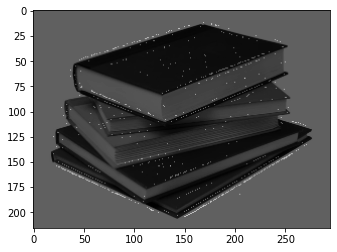




No. of Extremas are:  2017 



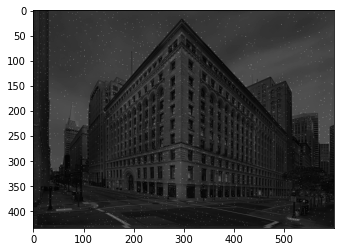

In [92]:
#Downscaling the Images

books_downscale = skimage.transform.rescale(books, 0.5, anti_aliasing=False)
building_downscale = skimage.transform.rescale(building, 0.5, anti_aliasing = False)
scale_space(books_downscale)
scale_space(building_downscale)

# *Gaussian Blur*

No. of Extremas are:  105 



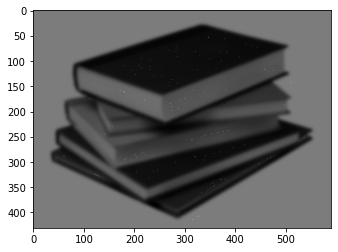




No. of Extremas are:  1911 



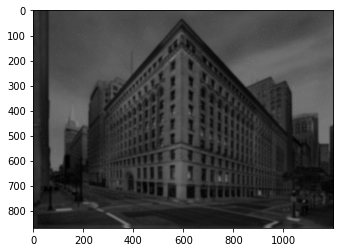

In [90]:
#Gaussian blur added to the images

books_blur = scipy.ndimage.gaussian_filter(books, 3)
building_blur = scipy.ndimage.gaussian_filter(building, 3)
scale_space(books_blur)
scale_space(building_blur)

# *Gaussian Noise*

No. of Extremas are:  1333 



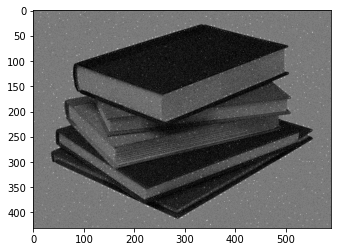




No. of Extremas are:  4985 



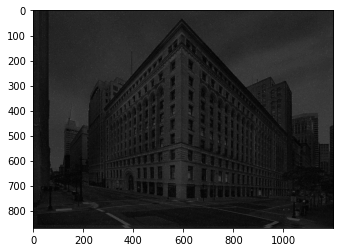

In [91]:
#Gaussian Noise added to the images

books_noise = skimage.util.random_noise(books, mode='gaussian')
building_noise = skimage.util.random_noise(building, mode='gaussian')
scale_space(books_noise)
scale_space(building_noise)